In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
from scipy.stats import zscore
import seaborn as sns
from matplotlib import pyplot as plt
import missingno as msno
from sklearn.linear_model import Lasso, LinearRegression, Ridge, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/melbourne-housing-market/Melbourne_housing_FULL.csv
/kaggle/input/melbourne-housing-market/MELBOURNE_HOUSE_PRICES_LESS.csv


In [2]:
df = pd.read_csv("/kaggle/input/melbourne-housing-market/Melbourne_housing_FULL.csv")
df_copy = df.copy()
df_copy.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


**EDA**

In [3]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

In [4]:
print(f'Shape     : {df_copy.shape}\n'
      f'Size      : {df_copy.size}\n' 
      f'Dimension : {df_copy.ndim}')

Shape     : (34857, 21)
Size      : 731997
Dimension : 2


In [5]:
df_copy.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

In [6]:
df_copy.duplicated().sum()

1

In [7]:
df_copy.loc[df_copy.duplicated(keep=False), :]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
15857,Nunawading,1/7 Lilian St,3,t,NaN,SP,Jellis,17/06/2017,15.4,3131.0,...,3.0,2.0,405.0,226.0,2000.0,Manningham City Council,-37.82678,145.16777,Eastern Metropolitan,4973.0
15858,Nunawading,1/7 Lilian St,3,t,NaN,SP,Jellis,17/06/2017,15.4,3131.0,...,3.0,2.0,405.0,226.0,2000.0,Manningham City Council,-37.82678,145.16777,Eastern Metropolitan,4973.0


In [8]:
df_copy = df_copy.drop_duplicates()
df_copy.duplicated().sum()

0

In [9]:
df_copy.describe().T

,count,mean,std,min,25%,50%,75%,max
Rooms,34856.0,3.031013e+00,0.969947,1.00000,2.00000,3.0000,4.000000e+00,1.600000e+01
Price,27247.0,1.050173e+06,641467.130105,85000.00000,635000.00000,870000.0000,1.295000e+06,1.120000e+07
Distance,34855.0,1.118481e+01,6.788952,0.00000,6.40000,10.3000,1.400000e+01,4.810000e+01
Postcode,34855.0,3.116062e+03,109.025437,3000.00000,3051.00000,3103.0000,3.156000e+03,3.978000e+03
Bedroom2,26639.0,3.084650e+00,0.980708,0.00000,2.00000,3.0000,4.000000e+00,3.000000e+01
Bathroom,26630.0,1.624747e+00,0.724177,0.00000,1.00000,2.0000,2.000000e+00,1.200000e+01
Car,26128.0,1.728835e+00,1.010789,0.00000,1.00000,2.0000,2.000000e+00,2.600000e+01
Landsize,23046.0,5.936072e+02,3398.915462,0.00000,224.00000,521.0000,6.700000e+02,4.330140e+05
BuildingArea,13741.0,1.602516e+02,401.281270,0.00000,102.00000,136.0000,1.880000e+02,4.451500e+04
YearBuilt,15550.0,1.965288e+03,37.328340,1196.00000,1940.00000,1970.0000,2.000000e+03,2.106000e+03


In [10]:
object_col = df_copy.select_dtypes(include='object').columns

for i in object_col:
    df_copy[i] = df_copy[i].astype('category')

In [11]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34856 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Suburb         34856 non-null  category
 1   Address        34856 non-null  category
 2   Rooms          34856 non-null  int64   
 3   Type           34856 non-null  category
 4   Price          27247 non-null  float64 
 5   Method         34856 non-null  category
 6   SellerG        34856 non-null  category
 7   Date           34856 non-null  category
 8   Distance       34855 non-null  float64 
 9   Postcode       34855 non-null  float64 
 10  Bedroom2       26639 non-null  float64 
 11  Bathroom       26630 non-null  float64 
 12  Car            26128 non-null  float64 
 13  Landsize       23046 non-null  float64 
 14  BuildingArea   13741 non-null  float64 
 15  YearBuilt      15550 non-null  float64 
 16  CouncilArea    34853 non-null  category
 17  Lattitude      26880 non-null  float

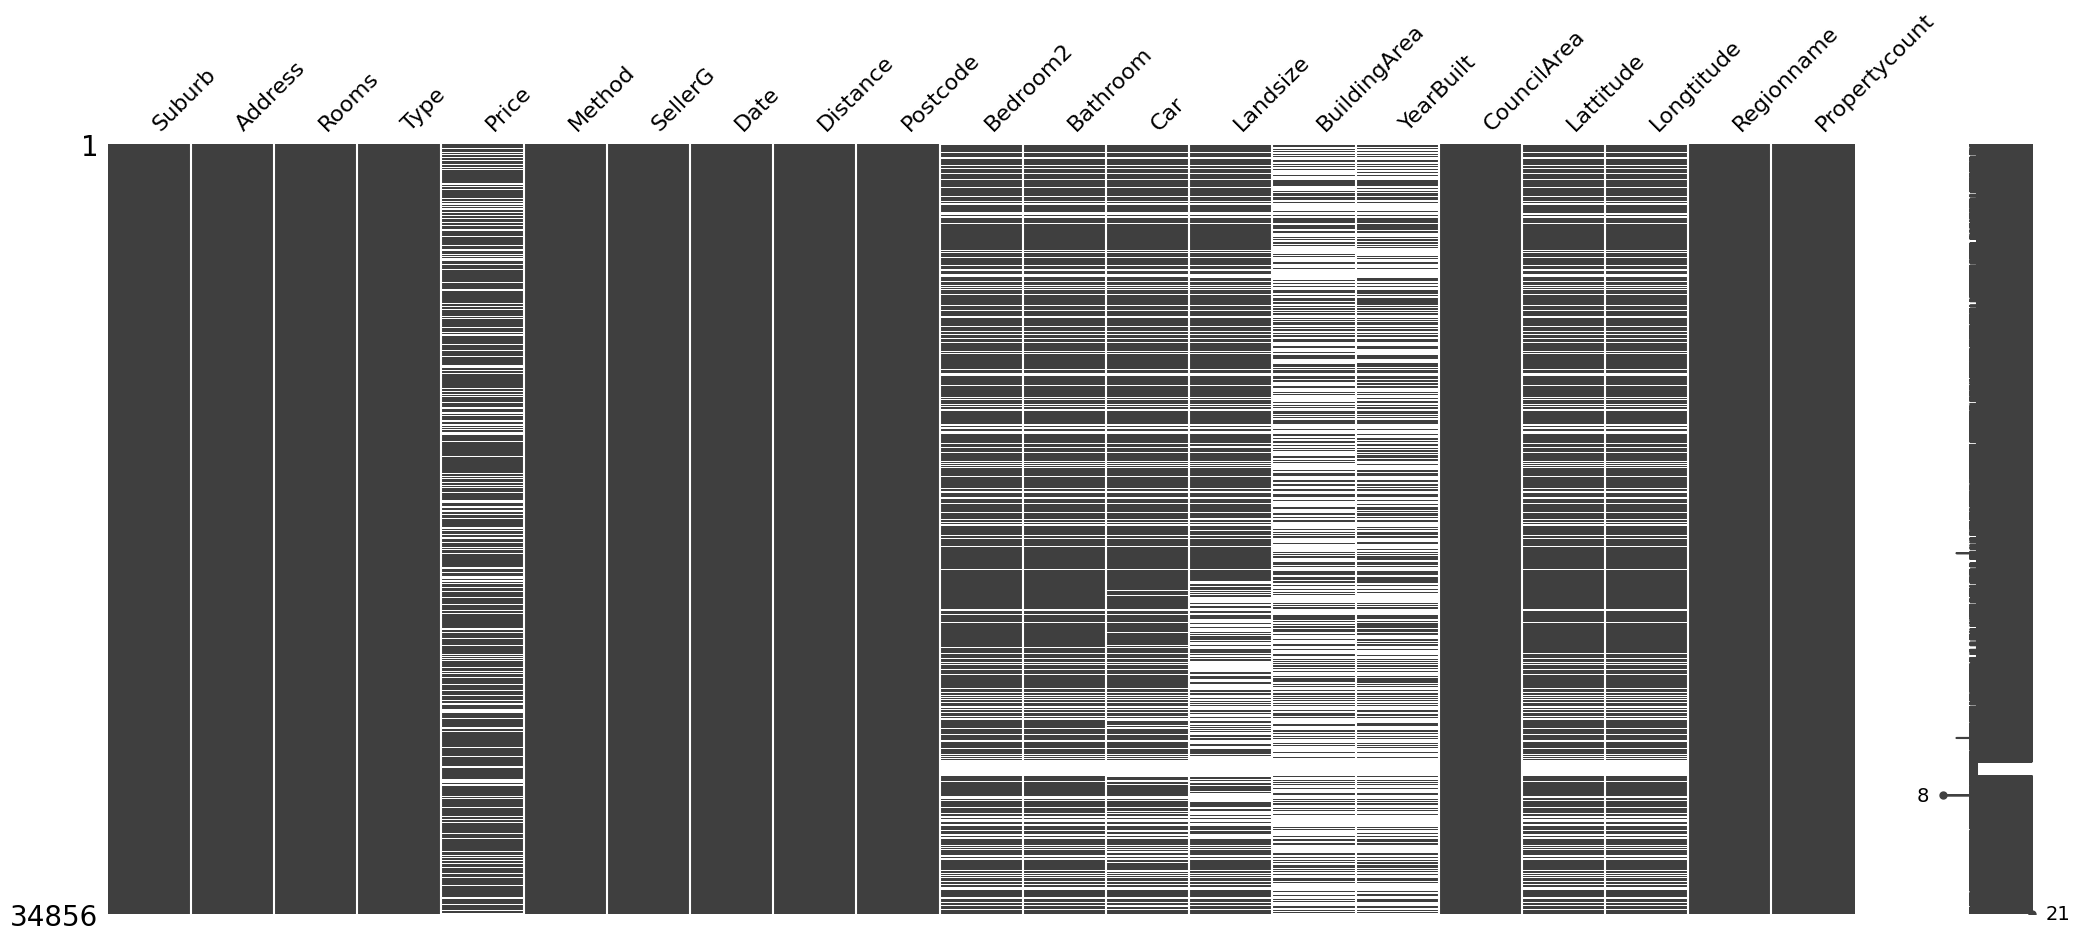

In [12]:
msno.matrix(df_copy);

In [13]:
df_copy.isna().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7609
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

In [14]:
df_copy[df_copy['Postcode'].isnull()]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
29483,Fawkner Lot,1/3 Brian St,3,h,616000.0,SP,Brad,6/01/2018,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
df_copy.loc[29483, 'Postcode'] = 3060.0
df_copy.loc[29483, 'Distance'] = df_copy[(df_copy['Postcode'] == 3060)]['Distance'].mode().values
df_copy.loc[29483, 'Regionname'] = 'Northern Metropolitan'
df_copy.loc[29483, 'Propertycount'] = 5070.0
df_copy.loc[29483, 'CouncilArea'] = 'Hume City Council'

df_copy.loc[18523, 'Regionname'] = 'Western Metropolitan'
df_copy.loc[18523, 'Propertycount'] = 7570.0
df_copy.loc[18523, 'CouncilArea'] = 'Maribyrnong City Council'

df_copy.loc[26888, 'Regionname'] = 'Southern Metropolitan'
df_copy.loc[26888, 'Propertycount'] = 8920.0
df_copy.loc[26888, 'CouncilArea'] = 'Boroondara City Council'

In [16]:
for i in df_copy.select_dtypes(include=['float', 'int']):
    z_scores = zscore(df_copy[i], nan_policy='omit')

    # Mutlak Z-skorlarını hesapla
    abs_z_scores = abs(z_scores)
    
    threshold = 3

    # Aykırı değerleri tespit et
    outliers = (abs_z_scores > threshold)

    # Aykırı değerleri tamamen sil
    df_copy = df_copy[~outliers]
    

    # Sonuçları yazdır
    print(f"{i} Z-skorları:")
    print(z_scores)

    print(f"\n{i}Mutlak Z-skorları:")
    print(abs_z_scores)

Rooms Z-skorları:
0       -1.062974
1       -1.062974
2       -1.062974
3       -0.031975
4       -0.031975
           ...   
34852    0.999024
34853   -1.062974
34854   -1.062974
34855   -0.031975
34856   -1.062974
Name: Rooms, Length: 34856, dtype: float64

RoomsMutlak Z-skorları:
0        1.062974
1        1.062974
2        1.062974
3        0.031975
4        0.031975
           ...   
34852    0.999024
34853    1.062974
34854    1.062974
34855    0.031975
34856    1.062974
Name: Rooms, Length: 34856, dtype: float64
Price Z-skorları:
0             NaN
1        0.687514
2       -0.015172
3             NaN
4        0.663828
           ...   
34852    0.687514
34853   -0.247295
34854   -0.536264
34855    0.150630
34856   -0.038858
Name: Price, Length: 34587, dtype: float64

PriceMutlak Z-skorları:
0             NaN
1        0.687514
2        0.015172
3             NaN
4        0.663828
           ...   
34852    0.687514
34853    0.247295
34854    0.536264
34855    0.150630
34856    0.

In [17]:
# Outlier Detection

In [18]:
pip install pyod

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.4/153.4 kB 5.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - \ | done
  Created wheel for pyod: filename=pyod-1.1.0-py3-none-any.whl size=185331 sha256=5dc70181065756bb20e065df63eb7405dd0ef763b0e04b87d56b32a4b9b6c174
  Stored in directory: /root/.cache/pip/wheels/36/8e/e2/e932956b10b843eb6be9eefa70b5c1bee7b561be14c423b136
Successfully built pyod
Note: you may need to restart the kernel to use updated packages.


<Axes: xlabel='Price', ylabel='Count'>

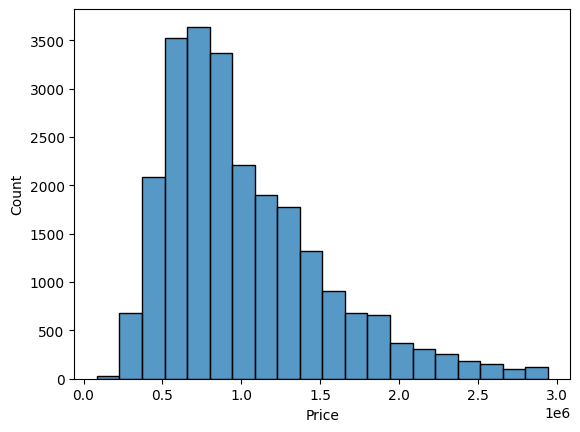

In [19]:
sns.histplot(data=df_copy, x='Price', bins=20)

<Axes: >

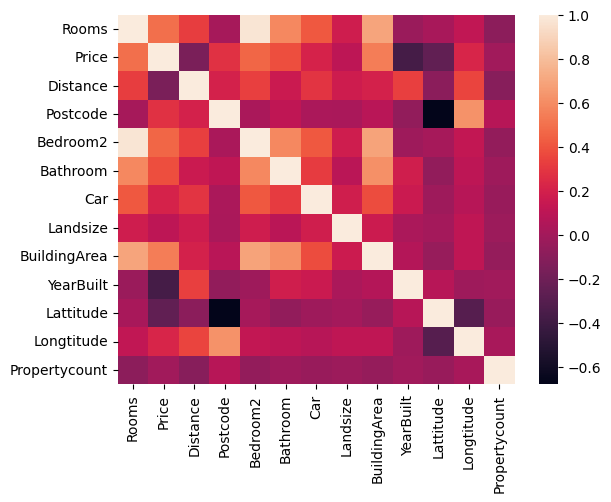

In [20]:
sns.heatmap((df_copy.select_dtypes(include=['float', 'int']).corr()))

In [21]:
df_copy.select_dtypes(include=['float', 'int']).corr().style.background_gradient(cmap="Blues")

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
Rooms,1.000000,0.494685,0.319508,0.015658,0.971667,0.584618,0.410578,0.177051,0.695988,-0.032171,0.016309,0.119312,-0.082758
Price,0.494685,1.000000,-0.156503,0.275104,0.457382,0.381792,0.206719,0.102740,0.541078,-0.376374,-0.258336,0.223221,-0.008917
Distance,0.319508,-0.156503,1.000000,0.205429,0.328622,0.158803,0.286876,0.168155,0.206302,0.325560,-0.089008,0.346815,-0.106825
Postcode,0.015658,0.275104,0.205429,1.000000,0.023078,0.110496,0.032032,0.028033,0.082110,-0.062815,-0.679125,0.621209,0.075396
Bedroom2,0.971667,0.457382,0.328622,0.023078,1.000000,0.581215,0.412002,0.176627,0.685623,-0.020524,0.015287,0.123637,-0.060911
Bathroom,0.584618,0.381792,0.158803,0.110496,0.581215,1.000000,0.311538,0.090903,0.615304,0.186493,-0.067871,0.106833,-0.020899
Car,0.410578,0.206719,0.286876,0.032032,0.412002,0.311538,1.000000,0.182297,0.376429,0.159814,-0.022831,0.080718,-0.037237
Landsize,0.177051,0.102740,0.168155,0.028033,0.176627,0.090903,0.182297,1.000000,0.164326,0.034853,0.009392,0.111489,-0.027538
BuildingArea,0.695988,0.541078,0.206302,0.082110,0.685623,0.615304,0.376429,0.164326,1.000000,0.066422,-0.046068,0.108247,-0.055326
YearBuilt,-0.032171,-0.376374,0.325560,-0.062815,-0.020524,0.186493,0.159814,0.034853,0.066422,1.000000,0.075943,-0.016872,-0.006017


In [22]:
df_copy.isna().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             6923
Method               0
SellerG              0
Date                 0
Distance             0
Postcode             0
Bedroom2          7640
Bathroom          7648
Car               8119
Landsize         10727
BuildingArea     19195
YearBuilt        17485
CouncilArea          0
Lattitude         7426
Longtitude        7426
Regionname           0
Propertycount        0
dtype: int64

In [23]:
df_copy.describe().T

,count,mean,std,min,25%,50%,75%,max
Rooms,31173.0,2.955057e+00,0.907856,1.00000,2.0000,3.00000,4.000000e+00,5.000000e+00
Price,24250.0,1.017361e+06,505367.918347,85000.00000,650000.0000,887000.00000,1.290000e+06,2.940000e+06
Distance,31173.0,1.030375e+01,5.412200,0.00000,6.2000,9.70000,1.380000e+01,3.120000e+01
Postcode,31173.0,3.101583e+03,60.088998,3000.00000,3046.0000,3101.00000,3.149000e+03,3.338000e+03
Bedroom2,23533.0,3.000765e+00,0.893628,1.00000,2.0000,3.00000,4.000000e+00,5.000000e+00
Bathroom,23525.0,1.562040e+00,0.632896,0.00000,1.0000,1.00000,2.000000e+00,3.000000e+00
Car,23054.0,1.630476e+00,0.850746,0.00000,1.0000,2.00000,2.000000e+00,4.000000e+00
Landsize,20446.0,4.935420e+02,544.205575,0.00000,206.0000,477.00000,6.560000e+02,9.900000e+03
BuildingArea,11978.0,1.449857e+02,69.646693,0.00000,100.0000,132.00000,1.800000e+02,5.157800e+02
YearBuilt,13688.0,1.963898e+03,36.876927,1854.00000,1940.0000,1970.00000,1.999000e+03,2.019000e+03


In [24]:
for column in df_copy.columns:
    df_copy[column] = df_copy[column].fillna(df_copy[column].mode().iloc[0])

In [25]:
df_copy.isna().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64

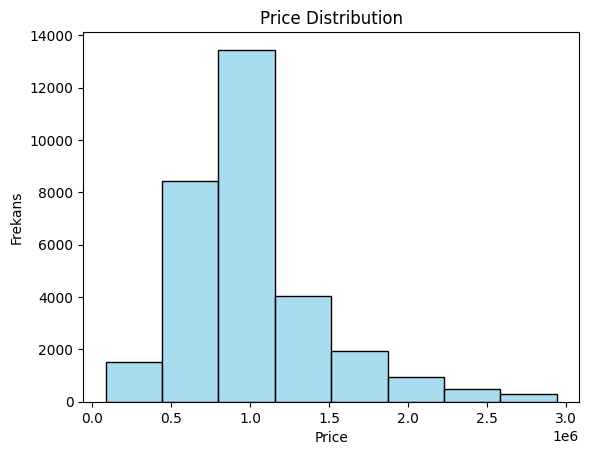

In [26]:
sns.histplot( x=df_copy['Price'], bins=8, alpha=0.7, color='skyblue')

plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frekans')

plt.show()

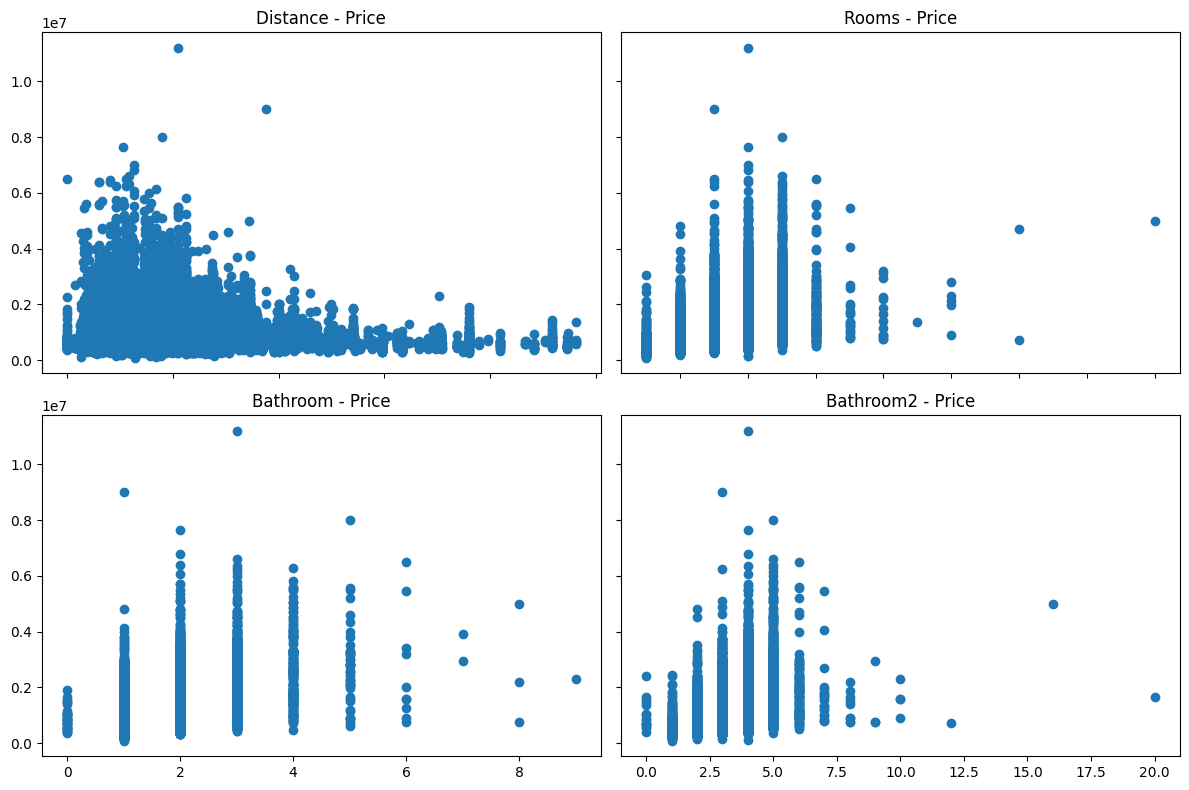

In [27]:
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

axs[0, 0].scatter(df['Distance'], df['Price'])
axs[0, 0].set_title('Distance - Price')

axs[0, 1].scatter(df['Rooms'], df['Price'])
axs[0, 1].set_title('Rooms - Price')

axs[1, 0].scatter(df['Bathroom'], df['Price'])
axs[1, 0].set_title('Bathroom - Price')

axs[1, 1].scatter(df['Bedroom2'], df['Price'])
axs[1, 1].set_title('Bathroom2 - Price')

for ax in axs.flat:
    ax.label_outer()

plt.tight_layout()
plt.show()

<Axes: xlabel='Bedroom2', ylabel='Price'>

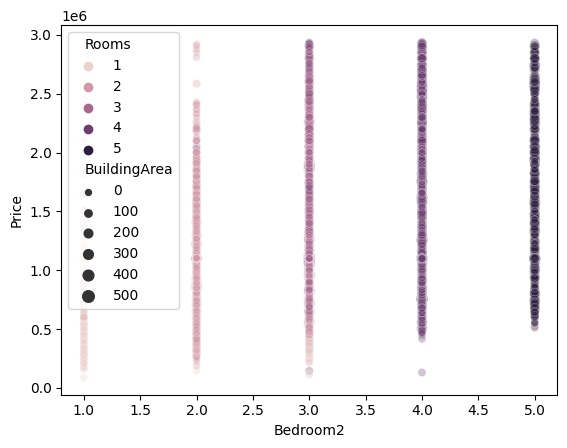

In [28]:
sns.scatterplot(data=df_copy, x='Bedroom2', y='Price', hue='Rooms', size='BuildingArea', alpha=0.3)

In [29]:
for sutun in df_copy.select_dtypes(include='category'):
    encoder = LabelEncoder()
    df_copy[sutun] = encoder.fit_transform(df_copy[sutun])

In [30]:
def evaluate_outlier_classifier(model, data):
    # Get labels
    labels = model.fit_predict(data)

    # Return inliers
    return data[labels == 0]
def evaluate_regressor(inliers):
    y = df_copy["Price"]
    X = df_copy.drop("Price", axis=1)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

    models = {
    'Lasso': {'model': Lasso()},
    'LinearRegression': {'model': LinearRegression()},
    'Ridge': {'model': Ridge()},
    'ElasticNet': {'model': ElasticNet()},
    'KNeighborsRegressor': {'model': KNeighborsRegressor()},
    'RandomForestRegressor': {'model': RandomForestRegressor()},
    'GradientBoostingRegressor': {'model': GradientBoostingRegressor()},
    'AdaBoostRegressor': {'model': AdaBoostRegressor(n_estimators = 5, learning_rate = 1.2, loss = 'exponential', random_state = 2)}
    }
    
    for name, model_info in models.items():
        model = model_info['model']
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_test, y_pred)
        print(f'########## {name} ##########')
        print(f'MAE: {mae:.4f}')
        print(f'MSE: {mse:.4f}')
        print(f'RMSE: {rmse:.4f}')
        print(f'R2 Score: {r2:.4f}\n')
        preds = model.predict(X_test)
        rmse = mean_squared_error(y_test, preds, squared=False)

    return round(rmse, 3)

In [31]:
from pyod.models.iforest import IForest

contaminations = [0.07, 0.1, 0.15, 0.25]
scores = dict()

for c in contaminations:
    # Instantiate IForest with the current c
    iforest = IForest(contamination=c, random_state=10)
    
    # Get inliers with the current IForest
    inliers = evaluate_outlier_classifier(iforest, df_copy)
    
    # Calculate and store RMSE into scores
    scores[c] = evaluate_regressor(inliers)
    
print(scores)

/opt/conda/lib/python3.10/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function fit_predict is deprecated
  warnings.warn(msg, category=FutureWarning)


########## Lasso ##########
MAE: 241701.8898
MSE: 104308338977.4780
RMSE: 322968.0154
R2 Score: 0.4635

########## LinearRegression ##########
MAE: 241701.5333
MSE: 104308149408.3581
RMSE: 322967.7219
R2 Score: 0.4635

########## Ridge ##########
MAE: 241711.0795
MSE: 104314177585.8770
RMSE: 322977.0543
R2 Score: 0.4635

########## ElasticNet ##########
MAE: 249173.3531
MSE: 111493035679.2487
RMSE: 333905.7287
R2 Score: 0.4266

########## KNeighborsRegressor ##########
MAE: 316726.9221
MSE: 175399730138.9837
RMSE: 418807.5096
R2 Score: 0.0979

########## RandomForestRegressor ##########
MAE: 200467.3468
MSE: 81969801027.5442
RMSE: 286303.6867
R2 Score: 0.5784

########## GradientBoostingRegressor ##########
MAE: 215265.6275
MSE: 87212521912.5637
RMSE: 295317.6627
R2 Score: 0.5514

########## AdaBoostRegressor ##########
MAE: 273095.5293
MSE: 116735295545.5941
RMSE: 341665.4732
R2 Score: 0.3996



/opt/conda/lib/python3.10/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function fit_predict is deprecated
  warnings.warn(msg, category=FutureWarning)


########## Lasso ##########
MAE: 241701.8898
MSE: 104308338977.4780
RMSE: 322968.0154
R2 Score: 0.4635

########## LinearRegression ##########
MAE: 241701.5333
MSE: 104308149408.3581
RMSE: 322967.7219
R2 Score: 0.4635

########## Ridge ##########
MAE: 241711.0795
MSE: 104314177585.8770
RMSE: 322977.0543
R2 Score: 0.4635

########## ElasticNet ##########
MAE: 249173.3531
MSE: 111493035679.2487
RMSE: 333905.7287
R2 Score: 0.4266

########## KNeighborsRegressor ##########
MAE: 316726.9221
MSE: 175399730138.9837
RMSE: 418807.5096
R2 Score: 0.0979

########## RandomForestRegressor ##########
MAE: 200374.2951
MSE: 81884264888.3383
RMSE: 286154.2676
R2 Score: 0.5788

########## GradientBoostingRegressor ##########
MAE: 215265.6275
MSE: 87212521912.5637
RMSE: 295317.6627
R2 Score: 0.5514

########## AdaBoostRegressor ##########
MAE: 273095.5293
MSE: 116735295545.5941
RMSE: 341665.4732
R2 Score: 0.3996



/opt/conda/lib/python3.10/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function fit_predict is deprecated
  warnings.warn(msg, category=FutureWarning)


########## Lasso ##########
MAE: 241701.8898
MSE: 104308338977.4780
RMSE: 322968.0154
R2 Score: 0.4635

########## LinearRegression ##########
MAE: 241701.5333
MSE: 104308149408.3581
RMSE: 322967.7219
R2 Score: 0.4635

########## Ridge ##########
MAE: 241711.0795
MSE: 104314177585.8770
RMSE: 322977.0543
R2 Score: 0.4635

########## ElasticNet ##########
MAE: 249173.3531
MSE: 111493035679.2487
RMSE: 333905.7287
R2 Score: 0.4266

########## KNeighborsRegressor ##########
MAE: 316726.9221
MSE: 175399730138.9837
RMSE: 418807.5096
R2 Score: 0.0979

########## RandomForestRegressor ##########
MAE: 200417.5700
MSE: 81911759905.5704
RMSE: 286202.3059
R2 Score: 0.5787

########## GradientBoostingRegressor ##########
MAE: 215242.1209
MSE: 87176869407.4421
RMSE: 295257.2936
R2 Score: 0.5516

########## AdaBoostRegressor ##########
MAE: 273095.5293
MSE: 116735295545.5941
RMSE: 341665.4732
R2 Score: 0.3996



/opt/conda/lib/python3.10/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function fit_predict is deprecated
  warnings.warn(msg, category=FutureWarning)


########## Lasso ##########
MAE: 241701.8898
MSE: 104308338977.4780
RMSE: 322968.0154
R2 Score: 0.4635

########## LinearRegression ##########
MAE: 241701.5333
MSE: 104308149408.3581
RMSE: 322967.7219
R2 Score: 0.4635

########## Ridge ##########
MAE: 241711.0795
MSE: 104314177585.8770
RMSE: 322977.0543
R2 Score: 0.4635

########## ElasticNet ##########
MAE: 249173.3531
MSE: 111493035679.2487
RMSE: 333905.7287
R2 Score: 0.4266

########## KNeighborsRegressor ##########
MAE: 316726.9221
MSE: 175399730138.9837
RMSE: 418807.5096
R2 Score: 0.0979

########## RandomForestRegressor ##########
MAE: 200362.4876
MSE: 82431998451.2420
RMSE: 287109.7324
R2 Score: 0.5760

########## GradientBoostingRegressor ##########
MAE: 215242.1209
MSE: 87176869407.4421
RMSE: 295257.2936
R2 Score: 0.5516

########## AdaBoostRegressor ##########
MAE: 273095.5293
MSE: 116735295545.5941
RMSE: 341665.4732
R2 Score: 0.3996

{0.07: 341665.473, 0.1: 341665.473, 0.15: 341665.473, 0.25: 341665.473}


In [32]:
from itertools import product
max_features = [0.6, 0.8, 1]
max_samples = [0.6, 0.8, 1]
scores = dict()

for mf, ms in product(max_features, max_samples):
    # Instantiate an IForest
    iforest = IForest(max_features=mf, max_samples=ms, n_jobs=-1, contamination=.15, random_state=1)
    
    # Get the inliers with the current IForest
    inliers = evaluate_outlier_classifier(iforest, df_copy)
    
    # Calculate and store RMSE into scores
    scores[(mf,ms)] = evaluate_regressor(inliers)
    
print(scores)

/opt/conda/lib/python3.10/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function fit_predict is deprecated
  warnings.warn(msg, category=FutureWarning)


########## Lasso ##########
MAE: 241701.8898
MSE: 104308338977.4780
RMSE: 322968.0154
R2 Score: 0.4635

########## LinearRegression ##########
MAE: 241701.5333
MSE: 104308149408.3581
RMSE: 322967.7219
R2 Score: 0.4635

########## Ridge ##########
MAE: 241711.0795
MSE: 104314177585.8770
RMSE: 322977.0543
R2 Score: 0.4635

########## ElasticNet ##########
MAE: 249173.3531
MSE: 111493035679.2487
RMSE: 333905.7287
R2 Score: 0.4266

########## KNeighborsRegressor ##########
MAE: 316726.9221
MSE: 175399730138.9837
RMSE: 418807.5096
R2 Score: 0.0979

########## RandomForestRegressor ##########
MAE: 199509.0540
MSE: 81506926566.7386
RMSE: 285494.1796
R2 Score: 0.5808

########## GradientBoostingRegressor ##########
MAE: 215265.6275
MSE: 87212521912.5636
RMSE: 295317.6627
R2 Score: 0.5514

########## AdaBoostRegressor ##########
MAE: 273095.5293
MSE: 116735295545.5941
RMSE: 341665.4732
R2 Score: 0.3996



/opt/conda/lib/python3.10/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function fit_predict is deprecated
  warnings.warn(msg, category=FutureWarning)


########## Lasso ##########
MAE: 241701.8898
MSE: 104308338977.4780
RMSE: 322968.0154
R2 Score: 0.4635

########## LinearRegression ##########
MAE: 241701.5333
MSE: 104308149408.3581
RMSE: 322967.7219
R2 Score: 0.4635

########## Ridge ##########
MAE: 241711.0795
MSE: 104314177585.8770
RMSE: 322977.0543
R2 Score: 0.4635

########## ElasticNet ##########
MAE: 249173.3531
MSE: 111493035679.2487
RMSE: 333905.7287
R2 Score: 0.4266

########## KNeighborsRegressor ##########
MAE: 316726.9221
MSE: 175399730138.9837
RMSE: 418807.5096
R2 Score: 0.0979

########## RandomForestRegressor ##########
MAE: 200408.3394
MSE: 81863834986.1817
RMSE: 286118.5681
R2 Score: 0.5790

########## GradientBoostingRegressor ##########
MAE: 215265.6275
MSE: 87212521912.5637
RMSE: 295317.6627
R2 Score: 0.5514

########## AdaBoostRegressor ##########
MAE: 273095.5293
MSE: 116735295545.5941
RMSE: 341665.4732
R2 Score: 0.3996



/opt/conda/lib/python3.10/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function fit_predict is deprecated
  warnings.warn(msg, category=FutureWarning)


########## Lasso ##########
MAE: 241701.8898
MSE: 104308338977.4780
RMSE: 322968.0154
R2 Score: 0.4635

########## LinearRegression ##########
MAE: 241701.5333
MSE: 104308149408.3581
RMSE: 322967.7219
R2 Score: 0.4635

########## Ridge ##########
MAE: 241711.0795
MSE: 104314177585.8770
RMSE: 322977.0543
R2 Score: 0.4635

########## ElasticNet ##########
MAE: 249173.3531
MSE: 111493035679.2487
RMSE: 333905.7287
R2 Score: 0.4266

########## KNeighborsRegressor ##########
MAE: 316726.9221
MSE: 175399730138.9837
RMSE: 418807.5096
R2 Score: 0.0979

########## RandomForestRegressor ##########
MAE: 200628.2654
MSE: 82213852503.2914
RMSE: 286729.5808
R2 Score: 0.5772

########## GradientBoostingRegressor ##########
MAE: 215242.1209
MSE: 87176869407.4421
RMSE: 295257.2936
R2 Score: 0.5516

########## AdaBoostRegressor ##########
MAE: 273095.5293
MSE: 116735295545.5941
RMSE: 341665.4732
R2 Score: 0.3996



/opt/conda/lib/python3.10/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function fit_predict is deprecated
  warnings.warn(msg, category=FutureWarning)


########## Lasso ##########
MAE: 241701.8898
MSE: 104308338977.4780
RMSE: 322968.0154
R2 Score: 0.4635

########## LinearRegression ##########
MAE: 241701.5333
MSE: 104308149408.3581
RMSE: 322967.7219
R2 Score: 0.4635

########## Ridge ##########
MAE: 241711.0795
MSE: 104314177585.8770
RMSE: 322977.0543
R2 Score: 0.4635

########## ElasticNet ##########
MAE: 249173.3531
MSE: 111493035679.2487
RMSE: 333905.7287
R2 Score: 0.4266

########## KNeighborsRegressor ##########
MAE: 316726.9221
MSE: 175399730138.9837
RMSE: 418807.5096
R2 Score: 0.0979

########## RandomForestRegressor ##########
MAE: 200470.8659
MSE: 81661677652.5568
RMSE: 285765.0742
R2 Score: 0.5800

########## GradientBoostingRegressor ##########
MAE: 215265.6275
MSE: 87212521912.5636
RMSE: 295317.6627
R2 Score: 0.5514

########## AdaBoostRegressor ##########
MAE: 273095.5293
MSE: 116735295545.5941
RMSE: 341665.4732
R2 Score: 0.3996



/opt/conda/lib/python3.10/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function fit_predict is deprecated
  warnings.warn(msg, category=FutureWarning)


########## Lasso ##########
MAE: 241701.8898
MSE: 104308338977.4780
RMSE: 322968.0154
R2 Score: 0.4635

########## LinearRegression ##########
MAE: 241701.5333
MSE: 104308149408.3581
RMSE: 322967.7219
R2 Score: 0.4635

########## Ridge ##########
MAE: 241711.0795
MSE: 104314177585.8770
RMSE: 322977.0543
R2 Score: 0.4635

########## ElasticNet ##########
MAE: 249173.3531
MSE: 111493035679.2487
RMSE: 333905.7287
R2 Score: 0.4266

########## KNeighborsRegressor ##########
MAE: 316726.9221
MSE: 175399730138.9837
RMSE: 418807.5096
R2 Score: 0.0979

########## RandomForestRegressor ##########
MAE: 200672.6571
MSE: 81910993641.3557
RMSE: 286200.9672
R2 Score: 0.5787

########## GradientBoostingRegressor ##########
MAE: 215242.1209
MSE: 87176869407.4421
RMSE: 295257.2936
R2 Score: 0.5516

########## AdaBoostRegressor ##########
MAE: 273095.5293
MSE: 116735295545.5941
RMSE: 341665.4732
R2 Score: 0.3996



/opt/conda/lib/python3.10/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function fit_predict is deprecated
  warnings.warn(msg, category=FutureWarning)


########## Lasso ##########
MAE: 241701.8898
MSE: 104308338977.4780
RMSE: 322968.0154
R2 Score: 0.4635

########## LinearRegression ##########
MAE: 241701.5333
MSE: 104308149408.3581
RMSE: 322967.7219
R2 Score: 0.4635

########## Ridge ##########
MAE: 241711.0795
MSE: 104314177585.8770
RMSE: 322977.0543
R2 Score: 0.4635

########## ElasticNet ##########
MAE: 249173.3531
MSE: 111493035679.2487
RMSE: 333905.7287
R2 Score: 0.4266

########## KNeighborsRegressor ##########
MAE: 316726.9221
MSE: 175399730138.9837
RMSE: 418807.5096
R2 Score: 0.0979

########## RandomForestRegressor ##########
MAE: 200445.5080
MSE: 82116954221.2346
RMSE: 286560.5594
R2 Score: 0.5777

########## GradientBoostingRegressor ##########
MAE: 215242.1209
MSE: 87176869407.4421
RMSE: 295257.2936
R2 Score: 0.5516

########## AdaBoostRegressor ##########
MAE: 273095.5293
MSE: 116735295545.5941
RMSE: 341665.4732
R2 Score: 0.3996



/opt/conda/lib/python3.10/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function fit_predict is deprecated
  warnings.warn(msg, category=FutureWarning)


########## Lasso ##########
MAE: 241701.8898
MSE: 104308338977.4780
RMSE: 322968.0154
R2 Score: 0.4635

########## LinearRegression ##########
MAE: 241701.5333
MSE: 104308149408.3581
RMSE: 322967.7219
R2 Score: 0.4635

########## Ridge ##########
MAE: 241711.0795
MSE: 104314177585.8770
RMSE: 322977.0543
R2 Score: 0.4635

########## ElasticNet ##########
MAE: 249173.3531
MSE: 111493035679.2487
RMSE: 333905.7287
R2 Score: 0.4266

########## KNeighborsRegressor ##########
MAE: 316726.9221
MSE: 175399730138.9837
RMSE: 418807.5096
R2 Score: 0.0979

########## RandomForestRegressor ##########
MAE: 200905.6765
MSE: 82398354492.4866
RMSE: 287051.1357
R2 Score: 0.5762

########## GradientBoostingRegressor ##########
MAE: 215242.1209
MSE: 87176869407.4421
RMSE: 295257.2936
R2 Score: 0.5516

########## AdaBoostRegressor ##########
MAE: 273095.5293
MSE: 116735295545.5941
RMSE: 341665.4732
R2 Score: 0.3996



/opt/conda/lib/python3.10/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function fit_predict is deprecated
  warnings.warn(msg, category=FutureWarning)


########## Lasso ##########
MAE: 241701.8898
MSE: 104308338977.4780
RMSE: 322968.0154
R2 Score: 0.4635

########## LinearRegression ##########
MAE: 241701.5333
MSE: 104308149408.3581
RMSE: 322967.7219
R2 Score: 0.4635

########## Ridge ##########
MAE: 241711.0795
MSE: 104314177585.8770
RMSE: 322977.0543
R2 Score: 0.4635

########## ElasticNet ##########
MAE: 249173.3531
MSE: 111493035679.2487
RMSE: 333905.7287
R2 Score: 0.4266

########## KNeighborsRegressor ##########
MAE: 316726.9221
MSE: 175399730138.9837
RMSE: 418807.5096
R2 Score: 0.0979

########## RandomForestRegressor ##########
MAE: 200102.3951
MSE: 81884349121.4363
RMSE: 286154.4148
R2 Score: 0.5788

########## GradientBoostingRegressor ##########
MAE: 215253.1397
MSE: 87192723717.6864
RMSE: 295284.1406
R2 Score: 0.5515

########## AdaBoostRegressor ##########
MAE: 273095.5293
MSE: 116735295545.5941
RMSE: 341665.4732
R2 Score: 0.3996



/opt/conda/lib/python3.10/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function fit_predict is deprecated
  warnings.warn(msg, category=FutureWarning)


########## Lasso ##########
MAE: 241701.8898
MSE: 104308338977.4780
RMSE: 322968.0154
R2 Score: 0.4635

########## LinearRegression ##########
MAE: 241701.5333
MSE: 104308149408.3581
RMSE: 322967.7219
R2 Score: 0.4635

########## Ridge ##########
MAE: 241711.0795
MSE: 104314177585.8770
RMSE: 322977.0543
R2 Score: 0.4635

########## ElasticNet ##########
MAE: 249173.3531
MSE: 111493035679.2487
RMSE: 333905.7287
R2 Score: 0.4266

########## KNeighborsRegressor ##########
MAE: 316726.9221
MSE: 175399730138.9837
RMSE: 418807.5096
R2 Score: 0.0979

########## RandomForestRegressor ##########
MAE: 200500.6272
MSE: 82323572358.5598
RMSE: 286920.8469
R2 Score: 0.5766

########## GradientBoostingRegressor ##########
MAE: 215254.6087
MSE: 87194951732.8162
RMSE: 295287.9133
R2 Score: 0.5515

########## AdaBoostRegressor ##########
MAE: 273095.5293
MSE: 116735295545.5941
RMSE: 341665.4732
R2 Score: 0.3996

{(0.6, 0.6): 341665.473, (0.6, 0.8): 341665.473, (0.6, 1): 341665.473, (0.8, 0.6): 341665.47

In [33]:
y = df_copy["Price"]
X = df_copy.drop("Price", axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [34]:
models = {
    'Lasso': {'model': Lasso()},
    'LinearRegression': {'model': LinearRegression()},
    'Ridge': {'model': Ridge()},
    'ElasticNet': {'model': ElasticNet()},
    'KNeighborsRegressor': {'model': KNeighborsRegressor()},
    'RandomForestRegressor': {'model': RandomForestRegressor()},
    'GradientBoostingRegressor': {'model': GradientBoostingRegressor()},
    'AdaBoostRegressor': {'model': AdaBoostRegressor(n_estimators = 5, learning_rate = 1.2, loss = 'exponential', random_state = 2)}
}

In [35]:
for name, model_info in models.items():
    model = model_info['model']
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    print(f'########## {name} ##########')
    print(f'MAE: {mae:.4f}')
    print(f'MSE: {mse:.4f}')
    print(f'RMSE: {rmse:.4f}')
    print(f'R2 Score: {r2:.4f}\n')

########## Lasso ##########
MAE: 241701.8898
MSE: 104308338977.4780
RMSE: 322968.0154
R2 Score: 0.4635

########## LinearRegression ##########
MAE: 241701.5333
MSE: 104308149408.3581
RMSE: 322967.7219
R2 Score: 0.4635

########## Ridge ##########
MAE: 241711.0795
MSE: 104314177585.8770
RMSE: 322977.0543
R2 Score: 0.4635

########## ElasticNet ##########
MAE: 249173.3531
MSE: 111493035679.2487
RMSE: 333905.7287
R2 Score: 0.4266

########## KNeighborsRegressor ##########
MAE: 316726.9221
MSE: 175399730138.9837
RMSE: 418807.5096
R2 Score: 0.0979

########## RandomForestRegressor ##########
MAE: 200106.5836
MSE: 81676705174.3580
RMSE: 285791.3665
R2 Score: 0.5799

########## GradientBoostingRegressor ##########
MAE: 215265.6275
MSE: 87212521912.5636
RMSE: 295317.6627
R2 Score: 0.5514

########## AdaBoostRegressor ##########
MAE: 273095.5293
MSE: 116735295545.5941
RMSE: 341665.4732
R2 Score: 0.3996

